Analysis:
1. There certainly seems to be a relationship between latitude and temperature, as expected. The closer you are to the equator (closer latitude is to 0) the warmer temperatures tend to be. This data shows temperature data from late March, very close to the spring equinox, so the distribution is centered around the equator. If the temperature data was from the winter I would expect the data to be skewed towards the southern latitudes and if taken in the summer skewed towards the northern latitudes, but still close to the equator.
2. There seems to be no relationship between cloud coverage and latitude, and there seems to be no relationship between humidity and latitude, however it is dificult to determine from just this scatter plot.
3. There seems to be little to no relationship between wind speed and latitude. However, at high northern latitudes wind speeds tend tend to be higher than other latitudes. I believe this could likely be because those cities are more likely to be above the tree line where trees no longer grow due to cold temperatures (mostly determined by elevation and latitude) The lack of trees could lead to higher wind speeds recorded.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [26]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
humid = []
cloud = []
wind = []
country = []
name = []

# Loop through the list of cities and perform a request for data on each
for x in range(len(cities)):
    print(f"Making request number: {x} for city: {cities[x]}")
    try:
        response = requests.get(query_url + cities[x]).json()
        response['coord']
    except KeyError:
        print(f"Skipping city, {cities[x]} could not be found.")
    else:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        name.append(response['name'])

Making request number: 0 for city: ceska kamenice
Making request number: 1 for city: fairbanks
Making request number: 2 for city: pangnirtung
Making request number: 3 for city: tremedal
Making request number: 4 for city: airai
Making request number: 5 for city: kaitangata
Making request number: 6 for city: lorengau
Making request number: 7 for city: busselton
Making request number: 8 for city: shalinskoye
Making request number: 9 for city: rikitea
Making request number: 10 for city: andreapol
Making request number: 11 for city: saint-pierre
Making request number: 12 for city: souillac
Making request number: 13 for city: belushya guba
Skipping city, belushya guba could not be found.
Making request number: 14 for city: dingle
Making request number: 15 for city: atuona
Making request number: 16 for city: ushuaia
Making request number: 17 for city: juifang
Skipping city, juifang could not be found.
Making request number: 18 for city: hobart
Making request number: 19 for city: yendi
Making 

Making request number: 161 for city: viedma
Making request number: 162 for city: beyneu
Making request number: 163 for city: jamestown
Making request number: 164 for city: grindavik
Making request number: 165 for city: pousat
Skipping city, pousat could not be found.
Making request number: 166 for city: mugur-aksy
Making request number: 167 for city: vanavara
Making request number: 168 for city: suratgarh
Making request number: 169 for city: kudahuvadhoo
Making request number: 170 for city: guerrero negro
Making request number: 171 for city: suntar
Making request number: 172 for city: bredasdorp
Making request number: 173 for city: ajalpan
Making request number: 174 for city: warangal
Making request number: 175 for city: lucapa
Making request number: 176 for city: jegunovce
Making request number: 177 for city: makung
Skipping city, makung could not be found.
Making request number: 178 for city: vestmanna
Making request number: 179 for city: pacific grove
Making request number: 180 for 

Making request number: 318 for city: acajutla
Making request number: 319 for city: college
Making request number: 320 for city: karatuzskoye
Making request number: 321 for city: velizh
Making request number: 322 for city: aswan
Making request number: 323 for city: honiara
Making request number: 324 for city: san julian
Making request number: 325 for city: waingapu
Making request number: 326 for city: kushima
Making request number: 327 for city: santa cruz
Making request number: 328 for city: impfondo
Making request number: 329 for city: arcata
Making request number: 330 for city: pangoa
Making request number: 331 for city: iskateley
Making request number: 332 for city: linchuan
Skipping city, linchuan could not be found.
Making request number: 333 for city: okhotsk
Making request number: 334 for city: nuevo progreso
Making request number: 335 for city: ponta do sol
Making request number: 336 for city: kholmogory
Making request number: 337 for city: bolungarvik
Skipping city, bolungarvi

Making request number: 481 for city: yar-sale
Making request number: 482 for city: saleaula
Skipping city, saleaula could not be found.
Making request number: 483 for city: veraval
Making request number: 484 for city: male
Making request number: 485 for city: paramonga
Making request number: 486 for city: itarema
Making request number: 487 for city: lompoc
Making request number: 488 for city: port hedland
Making request number: 489 for city: basco
Making request number: 490 for city: nioro
Making request number: 491 for city: edd
Making request number: 492 for city: sokoto
Making request number: 493 for city: itupiranga
Making request number: 494 for city: vung tau
Making request number: 495 for city: zarubino
Making request number: 496 for city: beira
Making request number: 497 for city: ishigaki
Making request number: 498 for city: queimadas
Making request number: 499 for city: horsham
Making request number: 500 for city: whittlesea
Making request number: 501 for city: leicester
Maki

In [27]:
print(f'Total cities found: {len(lat)}.')

Total cities found: 571.


In [30]:
weather_df = pd.DataFrame({
    'City':name,
    'Country':country,
    'Latitude':lat,
    'Temperature (F)':temp,
    'Humidity (%)':humid,
    'Cloudiness (%)':cloud,
    'Wind Speed (mph)':wind,
})

weather_df.to_csv('weather_data.csv')

weather_df

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ceska Kamenice,CZ,50.80,40.41,86,75,6.93
1,Fairbanks,US,64.84,39.79,86,90,6.93
2,Pangnirtung,CA,66.15,8.60,71,40,7.96
3,Tremedal,BR,-14.98,71.60,88,75,5.73
4,Airai,TL,-8.93,69.06,91,76,1.70
5,Kaitangata,NZ,-46.28,58.17,77,92,17.47
6,Lorengau,PG,-2.02,82.83,97,76,8.63
7,Busselton,AU,-33.64,55.47,45,0,14.67
8,Shalinskoye,RU,55.72,12.18,71,24,3.60
9,Rikitea,PF,-23.12,80.49,97,12,13.44


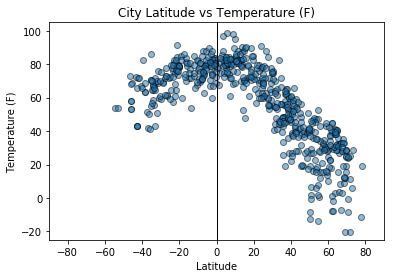

<Figure size 432x288 with 0 Axes>

In [70]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], alpha=0.5, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs Temperature (F)')
plt.xlim(-90,90)
plt.ylim(-25, 105)
plt.plot([0, 0], [-25, 105], 'k-', lw=1)
plt.show()
plt.savefig('Latitude_Temperature')

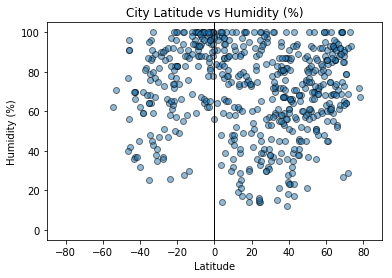

<Figure size 432x288 with 0 Axes>

In [71]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], alpha=0.5, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%)')
plt.ylim(-5,105)
plt.xlim(-90,90)
plt.plot([0, 0], [-5, 105], 'k-', lw=1)
plt.show()
plt.savefig('Latitude_Humidity.png')

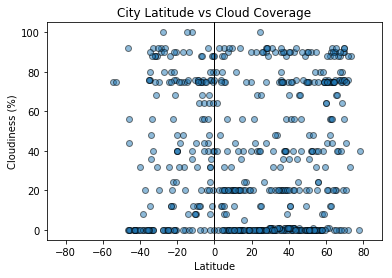

<Figure size 432x288 with 0 Axes>

In [72]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], alpha=0.5, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloud Coverage')
plt.xlim(-90,90)
plt.ylim(-5, 105)
plt.plot([0, 0], [-5, 105], 'k-', lw=1)
plt.show()
plt.savefig('Latitude_Cloud_Coverage.png')

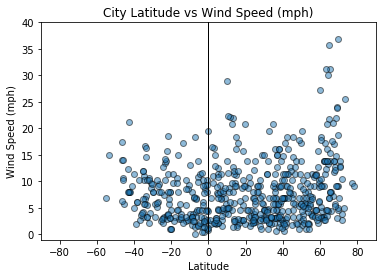

<Figure size 432x288 with 0 Axes>

In [73]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], alpha=0.5, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph)')
plt.xlim(-90,90)
plt.ylim(-1, 40)
plt.plot([0, 0], [-1, 40], 'k-', lw=1)
plt.show()
plt.savefig('Latitude_Wind_Speed.png')